In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import tensorflow as tf
print(tf.__version__)

import keras
print(keras.__version__)

2.13.1
2.13.1


In [ ]:
from tensorflow import keras

In [ ]:
!pip install tensorflow_hub
import tensorflow_hub as hub

In [ ]:
!pip show tensorflow_hub

Name: tensorflow-hub
Version: 0.16.1
Summary: TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.
Home-page: https://github.com/tensorflow/hub
Author: Google LLC
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, protobuf, tf-keras
Required-by: tensorflow-text


In [ ]:

!pip install tensorflow-text==2.13.0

In [ ]:
!pip show tensorflow_text
import tensorflow_text

Name: tensorflow-text
Version: 2.13.0
Summary: TF.Text is a TensorFlow library of text related ops, modules, and subgraphs.
Home-page: http://github.com/tensorflow/text
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: tensorflow, tensorflow-hub
Required-by: 


# Importing necessary packages

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

import nltk
nltk.download("stopwords")
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

import tensorflow as tf
# !pip install -q tensorflow_text
# import tensorflow_hub as hub
import tensorflow_text as tf_text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import os

# Loading the Resume dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HarishK501/my-sample/master/resume_dataset.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
print (df['Category'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


### Countplot

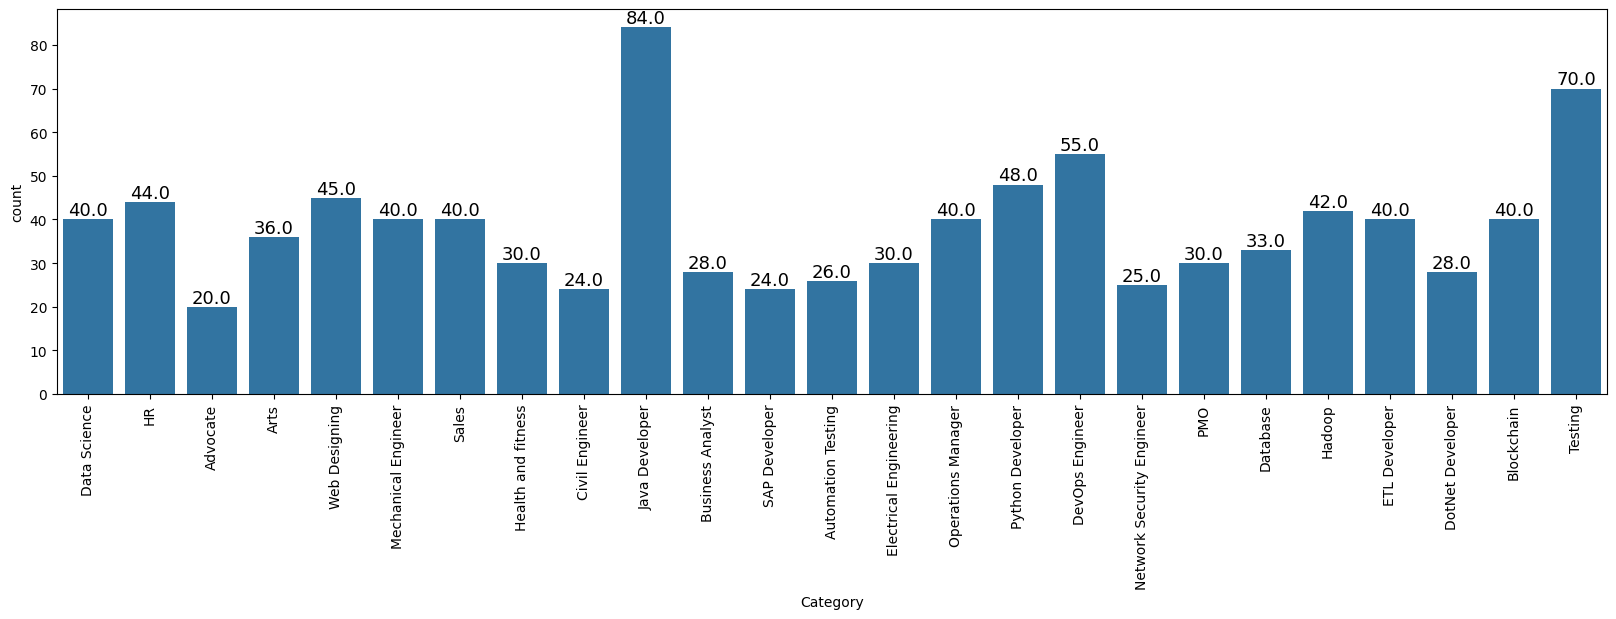

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=df['Category'])
for i in ax.patches:
  ax.annotate("{}".format(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom', size=13)
plt.show()

### Pie chart

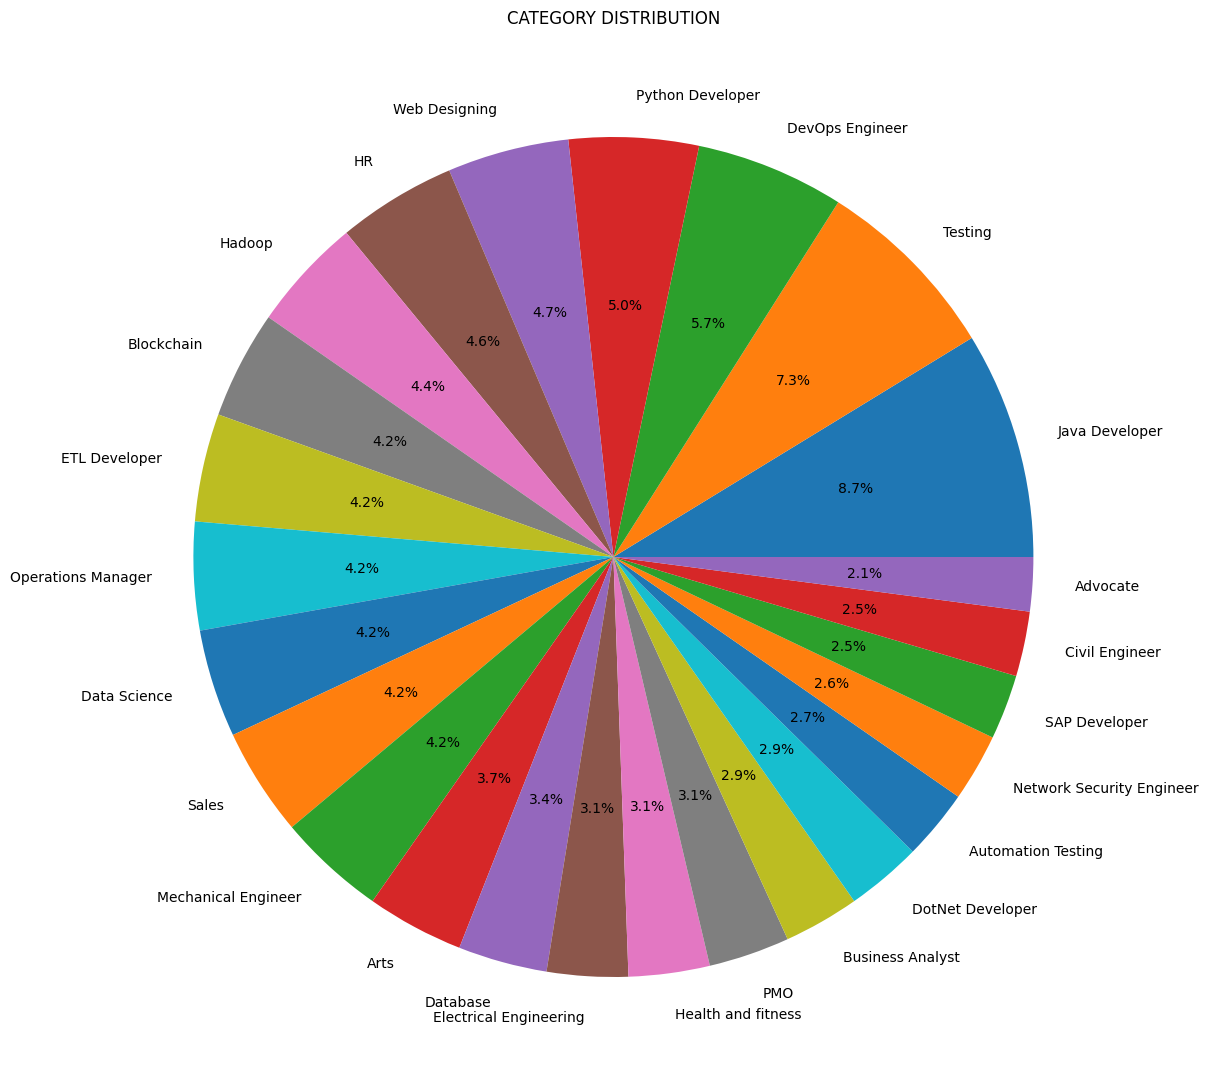

In [ ]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts(sort=True)
targetLabels  = list(targetCounts.index)
# Make square figures and axes
plt.figure(1, figsize=(30, 30))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%')
plt.show()

# Preprocessing the data

## Using a sample text

In [ ]:
sampleData = df['Resume'][0][:500]
sampleData

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib'

## Initializing stemmer, lemmatizer and stop words

In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stopWords = stopwords.words("english")

## Removing URLs

In [ ]:
temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', sampleData)

## Removing any character that is not an alphabet

In [ ]:
temp = re.sub("[^a-zA-Z]", " ", temp)

# Remove spaces > 1
temp = re.sub(' +', ' ', temp).lower()
temp

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d js dc js plotly kibana matplotlib'

## Stemming

In [ ]:
temp_s = " ".join([stemmer.stem(w) for w in temp.split(' ') if w not in stopWords])
temp_s


'skill program languag python panda numpi scipi scikit learn matplotlib sql java javascript jqueri machin learn regress svm na bay knn random forest decis tree boost techniqu cluster analysi word embed sentiment analysi natur languag process dimension reduct topic model lda nmf pca neural net databas visual mysql sqlserver cassandra hbase elasticsearch js dc js plotli kibana matplotlib'

## Lemmatization

In [ ]:
temp_l = " ".join([lemmatizer.lemmatize(w) for w in temp.split(' ') if w not in stopWords])
temp_l

'skill programming language python panda numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch j dc j plotly kibana matplotlib'

From these outputs, we can see that lemmatization leads to loss of original data. So, we prefer stemming to lemmatization.

## Applying preprocessing for entire dataset

In [ ]:
preprocessed_col = []
for row in df["Resume"]:
  temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', row)
  temp = re.sub("[^a-zA-Z]", " ", temp)
  temp = re.sub(' +', ' ', temp).lower()
  temp_s = " ".join([word for word in [stemmer.stem(w) for w in temp.split(' ') if w not in stopWords] if len(word) >1])
  preprocessed_col.append(temp_s)

df['preprocessed'] = preprocessed_col
df.head(10)


,Category,Resume,preprocessed
0,Data Science,Skills * Programming Languages: Python (pandas...,skill program languag python panda numpi scipi...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,educ detail may may uit rgpv data scientist da...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill python sap hana tableau sap hana sql sap...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",educ detail mca ymcaust faridabad haryana data...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",skill basic iot python matlab data scienc mach...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skill python tableau data visual studio machin...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,educ detail tech rayat bahra institut engin bi...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,person skill abil quickli grasp technic aspect...
9,Data Science,Expertise â Data and Quantitative Analysis â...,expertis data quantit analysi decis analyt pre...


# Feature Extraction

 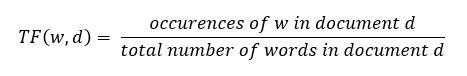

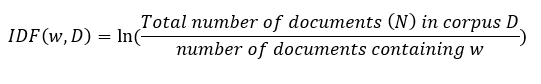

## TF-IDF vectorization

In [ ]:
text = df['preprocessed'].values
target = df['Category'].values
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)
tf_idf_vectors = pd.DataFrame.sparse.from_spmatrix(WordFeatures)
tf_idf_vectors

,0,1,2,3,4,5,6,7,8,9,...,5062,5063,5064,5065,5066,5067,5068,5069,5070,5071
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
958,0.0,0.0,0.0,0.0,0.195412,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
959,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.044039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
960,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Sentence embedding using BERT

In [ ]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

bert_preprocess_model = hub.KerasLayer(preprocess_url)
bert_model = hub.KerasLayer(encoder_url)

### Understanding BERT


In [ ]:
# bert_preprocess_model.save('saved_models/bert_preprocess_model')
text_test = ["python", "language", "water", "earth", "jeff bezos", "elon musk"]
text_preprocessed = bert_preprocess_model(text_test)

bert_results = bert_model(text_preprocessed)
e = bert_results['pooled_output'].numpy()
# print([e])

pd.DataFrame(e, index=text_test)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
python,-0.935785,-0.452862,-0.465415,0.821157,0.353258,-0.257456,0.924273,0.322764,-0.518862,-0.999992,...,0.582332,0.128193,0.812947,0.898100,-0.448746,0.280073,0.656865,-0.416346,-0.703154,0.921235
language,-0.895947,-0.385178,0.003239,0.829398,0.187932,-0.244842,0.933969,0.321625,0.141228,-0.999966,...,0.362290,0.316406,0.378790,0.906282,-0.534161,0.542080,0.433029,-0.133081,-0.626845,0.894345
water,-0.792728,-0.182214,0.557206,0.590057,-0.411221,-0.118566,0.845614,0.181742,0.339735,-0.999286,...,0.187674,0.444377,-0.304922,0.794130,0.315070,0.635854,0.292122,0.474161,-0.562634,0.820882
earth,-0.851958,-0.321084,0.096514,0.737104,-0.093679,-0.174810,0.886341,0.354278,0.072918,-0.999879,...,0.308783,-0.017101,0.159058,0.852112,0.025877,0.627662,0.402612,0.188862,-0.668777,0.842467
jeff bezos,-0.825335,-0.355506,-0.590698,0.699300,0.010950,-0.012865,0.838189,0.200416,-0.177354,-0.999968,...,0.587460,-0.167511,0.621887,0.850546,-0.183886,0.443813,0.666098,-0.016138,-0.614176,0.872303
elon musk,-0.750413,-0.268126,-0.266897,0.653196,-0.028937,-0.012987,0.802418,0.225097,-0.022700,-0.999841,...,0.479410,-0.039063,0.415246,0.769237,-0.095090,0.439657,0.596759,0.028394,-0.593810,0.797499


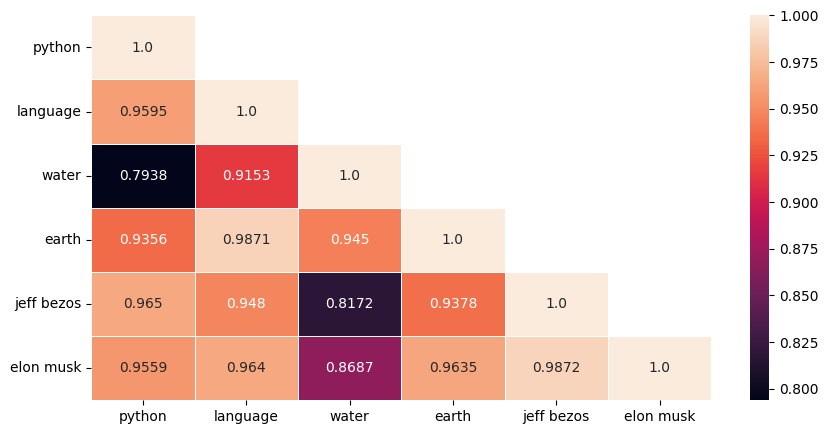

In [ ]:
cos_sim = cosine_similarity(e, e)
plt.figure(figsize=(10,5))
hmap = sns.heatmap(cos_sim, annot=True, mask=np.triu(cos_sim, 1), linewidths=.5, fmt=".4")
hmap.set_xticklabels(text_test)
hmap.set_yticklabels(text_test, rotation=0)
plt.show()

### Using BERT on preprocessed Resume dataset

In [ ]:
text = df['Resume'].values
bert_data = []
for row in text:
  temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', row)
  temp = re.sub("[^a-zA-Z]", " ", temp)
  temp = re.sub(' +', ' ', temp).lower()
  bert_data.append(temp)

# text_preprocessed = bert_preprocess_model(bert_data)
text_preprocessed = bert_preprocess_model(df["preprocessed"].values)
bert_results = bert_model(text_preprocessed)
e = bert_results['pooled_output'].numpy()
# print([e])

bert_vectors = pd.DataFrame(e)

In [ ]:
# Assuming df is your DataFrame
bert_vectors.to_csv('bert_vectors.csv', index=False)  # Set index=False if you don't want to save row numbers


In [ ]:
bert_vectors

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.742515,-0.529601,-0.789111,0.561048,0.526116,-0.342130,0.408142,0.457730,-0.440636,-0.999913,...,0.536641,0.085958,0.831779,0.628558,-0.268940,0.300335,0.686054,-0.762172,-0.705691,0.602152
1,-0.806502,-0.400761,-0.641354,0.667975,0.126806,-0.093488,0.567385,0.343024,0.028159,-0.999947,...,0.382577,0.138706,0.511897,0.721744,0.233405,0.463337,0.467019,-0.554839,-0.560828,0.614560
2,-0.806116,-0.496433,-0.587226,0.677957,0.241337,-0.210358,0.569755,0.483423,-0.166953,-0.999966,...,0.584394,0.148256,0.623227,0.726391,-0.033613,0.418716,0.699137,-0.465552,-0.709431,0.714045
3,-0.730010,-0.505111,-0.828543,0.700810,0.525699,-0.195790,0.477651,0.469600,-0.195100,-0.999935,...,0.500199,-0.155464,0.808382,0.686128,-0.103291,0.317916,0.605868,-0.708993,-0.605593,0.591835
4,-0.815893,-0.430555,-0.659116,0.701185,0.303845,-0.157178,0.636535,0.342126,-0.031556,-0.999971,...,0.500031,0.214974,0.583644,0.782774,0.312384,0.285148,0.556841,-0.544362,-0.628347,0.747639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,-0.782366,-0.484760,-0.772633,0.685514,0.404721,-0.200646,0.664741,0.442506,-0.274292,-0.999961,...,0.558364,0.151305,0.695415,0.742863,0.359061,0.240237,0.617506,-0.616544,-0.647839,0.663030
958,-0.755432,-0.323609,-0.406152,0.577668,0.104974,0.042173,0.646207,0.282658,0.223035,-0.999939,...,0.426797,0.252455,0.132883,0.757150,0.375825,0.512327,0.528655,-0.399326,-0.515872,0.687332
959,-0.783398,-0.492950,-0.517158,0.596865,0.207125,-0.180327,0.564677,0.459397,0.187509,-0.999935,...,0.361802,0.325351,0.258425,0.761751,0.566173,0.572986,0.455549,-0.373495,-0.613335,0.641300
960,-0.825090,-0.565343,-0.833363,0.725994,0.377736,-0.191407,0.597168,0.481017,-0.330961,-0.999976,...,0.473134,-0.062619,0.824755,0.727555,0.105220,0.250965,0.579458,-0.726474,-0.631002,0.635151


Now that we have the extracted feature vectors, we are good to proceed to the classification phase

# Classification

In [ ]:
def format_score(score):
  return round(score*100, 4)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def results(trues, preds) :
  precision = precision_score(trues, preds, average='weighted')  # 'weighted' averaging for multiclass problems
  print("Precision:", precision)
  recall = recall_score(trues, preds, average='weighted')  # 'weighted' averaging for multiclass problems
  print("Recall:", recall)
  f1 = f1_score(trues, preds, average='weighted')  # 'weighted' averaging for multiclass problems
  print("F1-score:", f1)
  class_report = classification_report(trues, preds)
  print("Classification Report:\n", class_report)
  cm = confusion_matrix(trues, preds)
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(target), yticklabels=np.unique(target))
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

In [ ]:
def normalizedCM(trues, preds) :
  cm = confusion_matrix(trues, preds)

# Calculate normalized confusion matrix
  normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]

  # Plot normalized confusion matrix
  plt.figure(figsize=(10, 8))
  sns.heatmap(normalized_cm, annot=True, cmap='Blues', xticklabels=np.unique(target), yticklabels=np.unique(target))
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Normalized Confusion Matrix')
  plt.show()


### Train Test split

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tf_idf_vectors, target, test_size=0.2, random_state=42)


In [ ]:
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(bert_vectors, target, test_size=0.2, random_state=1)


In [ ]:
X_train_bert

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
865,-0.702548,-0.363643,-0.678406,0.634219,0.339803,-0.108180,0.329133,0.423461,0.046093,-0.999777,...,0.426907,0.240535,0.590626,0.580673,0.058612,0.414095,0.561300,-0.601960,-0.584867,0.572496
223,-0.846107,-0.488473,-0.711521,0.715079,0.346523,-0.125738,0.690100,0.456026,-0.002059,-0.999984,...,0.431848,0.182804,0.670659,0.745507,0.246911,0.455603,0.496896,-0.653033,-0.545043,0.687380
761,-0.804114,-0.525006,-0.706163,0.650956,0.383077,-0.166030,0.570509,0.480540,-0.228742,-0.999970,...,0.638633,0.168465,0.767244,0.742770,0.161361,0.310883,0.697502,-0.553906,-0.636952,0.736144
951,-0.755432,-0.323609,-0.406152,0.577668,0.104974,0.042173,0.646207,0.282658,0.223035,-0.999939,...,0.426797,0.252455,0.132883,0.757150,0.375825,0.512327,0.528655,-0.399326,-0.515872,0.687332
773,-0.764163,-0.452777,-0.649882,0.591601,0.375812,-0.213260,0.525609,0.341934,-0.176605,-0.999940,...,0.451805,0.046024,0.666972,0.688499,-0.025610,0.477705,0.543388,-0.629632,-0.664741,0.685257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,-0.741204,-0.420395,-0.644527,0.574976,0.240204,-0.153349,0.477741,0.412685,-0.040159,-0.999924,...,0.511458,0.180766,0.541619,0.630461,0.317903,0.408622,0.582233,-0.456439,-0.578716,0.643668
72,-0.781250,-0.404042,-0.365312,0.544695,0.058313,-0.135770,0.452093,0.368431,0.267733,-0.999923,...,0.474099,0.390153,0.203162,0.735392,0.342378,0.527037,0.538697,-0.397747,-0.625188,0.629938
908,-0.782366,-0.484760,-0.772633,0.685514,0.404721,-0.200646,0.664741,0.442506,-0.274292,-0.999961,...,0.558364,0.151305,0.695415,0.742863,0.359061,0.240237,0.617506,-0.616544,-0.647839,0.663030
235,-0.774981,-0.456690,-0.556630,0.526049,0.323486,-0.079809,0.588517,0.400926,0.239823,-0.999931,...,0.448200,0.296157,0.393804,0.737988,0.404684,0.524443,0.471092,-0.503594,-0.495910,0.677394


In [ ]:
pd.DataFrame(y_test_bert).value_counts()


Java Developer               14
Blockchain                   13
Testing                      12
Sales                        11
Python Developer             11
HR                           10
DevOps Engineer              10
Data Science                  9
ETL Developer                 9
Mechanical Engineer           9
Operations Manager            8
Network Security Engineer     8
Web Designing                 7
Electrical Engineering        7
Civil Engineer                7
Arts                          6
SAP Developer                 6
Business Analyst              6
Database                      5
PMO                           5
Automation Testing            5
Health and fitness            4
DotNet Developer              4
Advocate                      4
Hadoop                        3
dtype: int64

## k-Nearest Neighbours

### Using TF-IDF vectors

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_tfidf, y_train_tfidf)

print("Accuracy:", format_score(model.score(X_test_tfidf, y_test_tfidf)))


Accuracy: 97.9275


### Using vectors obtained from BERT

Accuracy: 87.5648
Precision: 0.8961794106871827
Recall: 0.8756476683937824
F1-score: 0.8646876081724251
Classification Report:
                            precision    recall  f1-score   support

                 Advocate       0.33      0.25      0.29         4
                     Arts       0.75      1.00      0.86         6
       Automation Testing       1.00      0.60      0.75         5
               Blockchain       1.00      1.00      1.00        13
         Business Analyst       0.67      1.00      0.80         6
           Civil Engineer       1.00      0.71      0.83         7
             Data Science       0.88      0.78      0.82         9
                 Database       1.00      0.40      0.57         5
          DevOps Engineer       1.00      0.90      0.95        10
         DotNet Developer       0.67      1.00      0.80         4
            ETL Developer       1.00      1.00      1.00         9
   Electrical Engineering       1.00      1.00      1.00         7


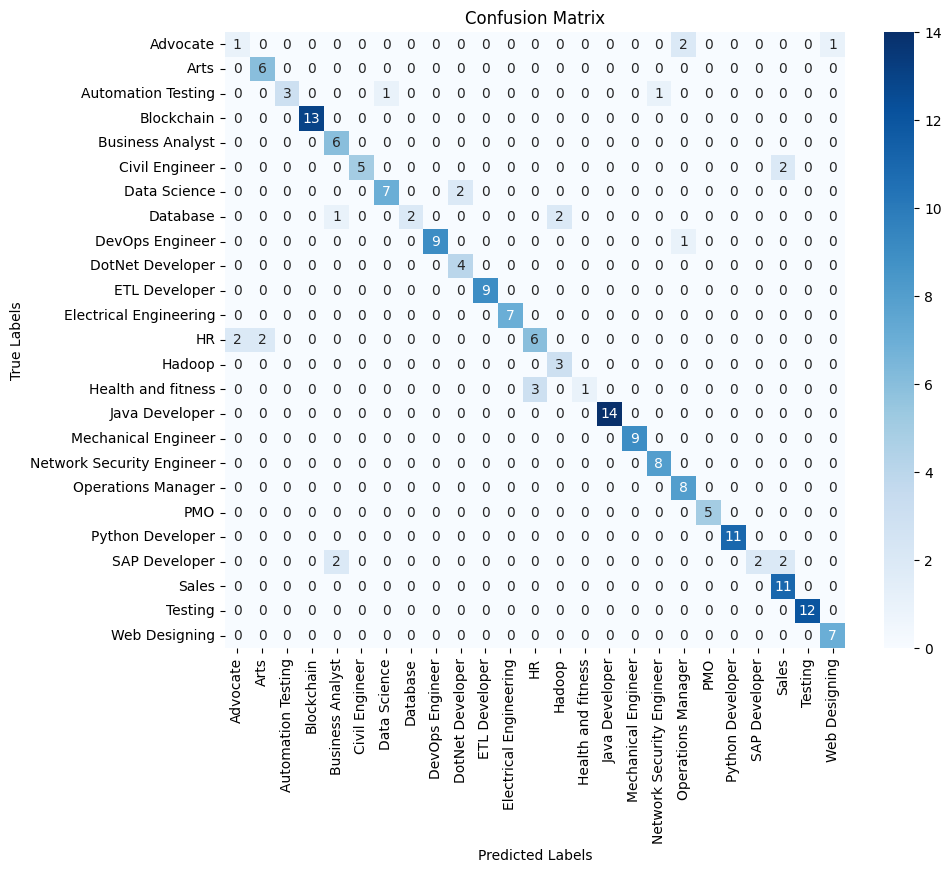

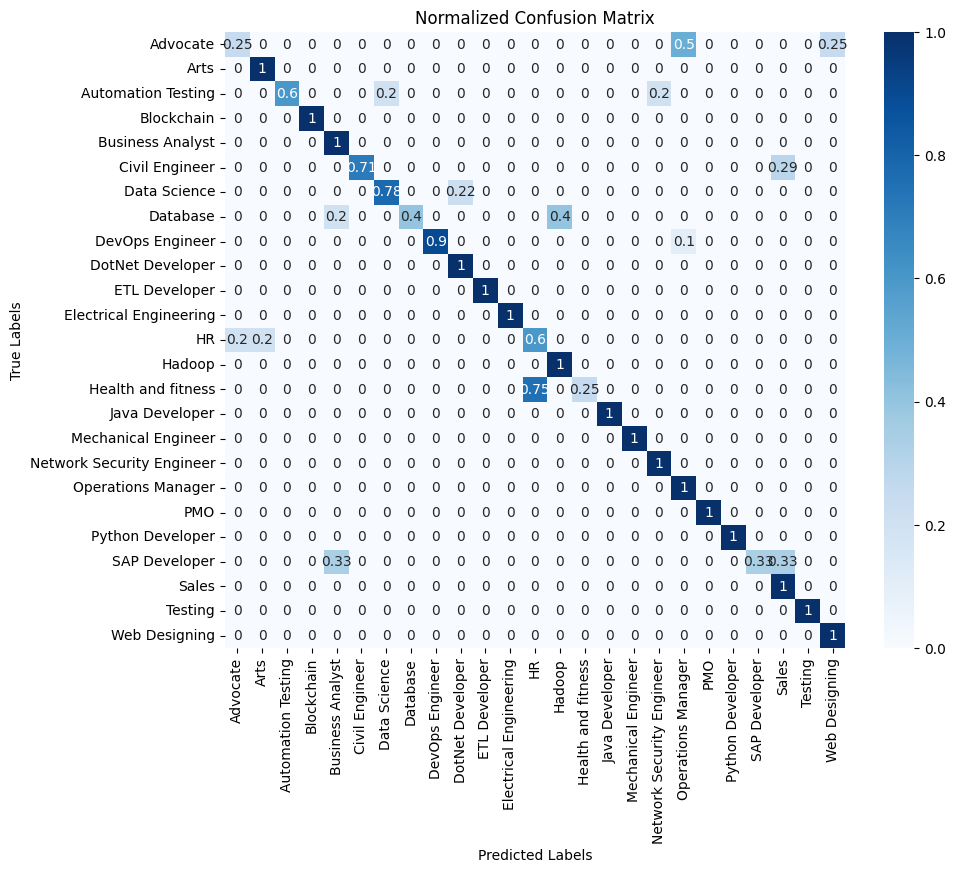

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_bert, y_train_bert)
knnpreds = model.predict(X_test_bert)
print("Accuracy:", format_score(model.score(X_test_bert, y_test_bert)))
results(y_test_bert, knnpreds)
normalizedCM(y_test_bert, knnpreds)

## Decision Tree

### Using TF-IDF vectors

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_tfidf, y_train_tfidf)

print("Accuracy:", format_score(model.score(X_test_tfidf, y_test_tfidf)))


Accuracy: 99.4819


### Using vectors obtained from BERT

Accuracy: 98.4456
Precision: 0.9866765358993338
Recall: 0.9844559585492227
F1-score: 0.9831903393397803
Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      0.50      0.67         4
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00        13
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         7
             Data Science       1.00      1.00      1.00         9
                 Database       1.00      1.00      1.00         5
          DevOps Engineer       1.00      0.90      0.95        10
         DotNet Developer       1.00      1.00      1.00         4
            ETL Developer       1.00      1.00      1.00         9
   Electrical Engineering       1.00      1.00      1.00         7


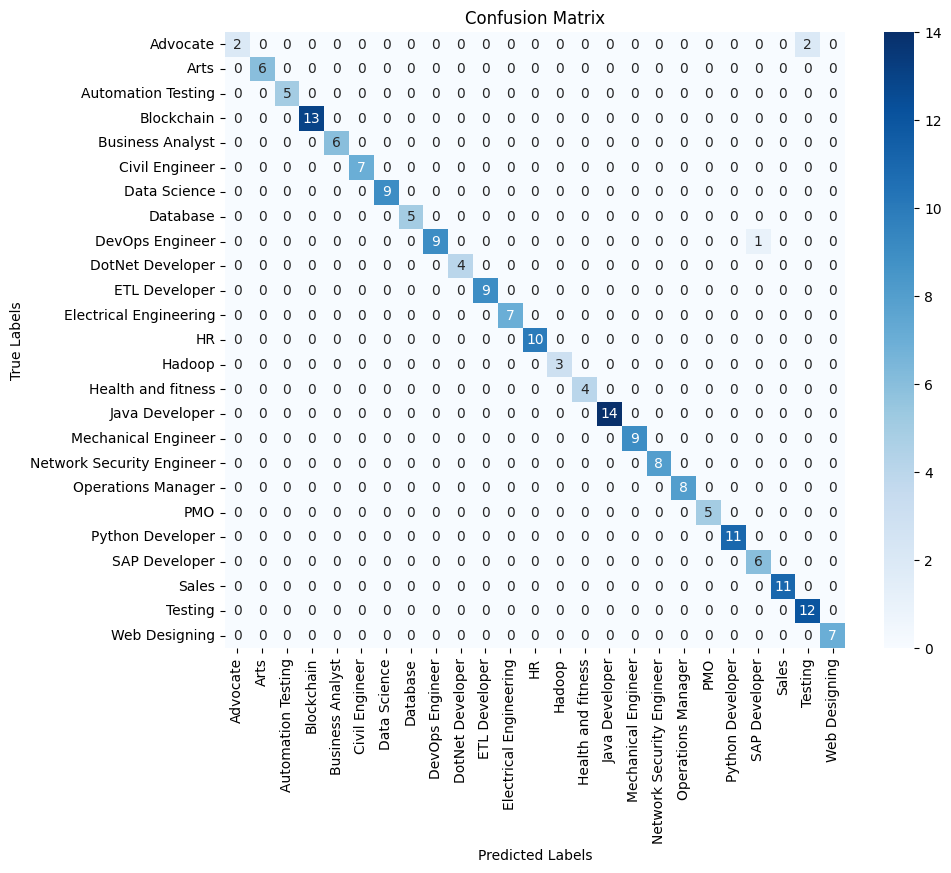

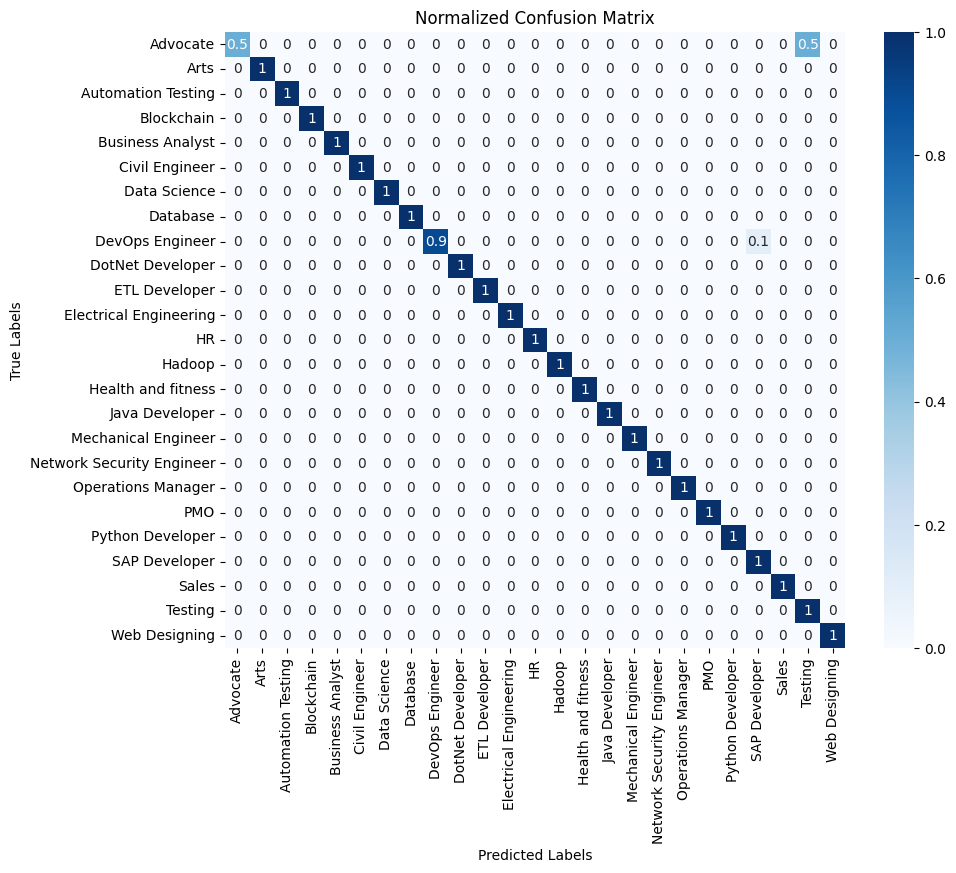

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_bert, y_train_bert)
dtpreds = model.predict(X_test_bert)
print("Accuracy:", format_score(model.score(X_test_bert, y_test_bert)))

results(y_test_bert, dtpreds)
normalizedCM(y_test_bert, dtpreds)

Accuracy: 98.4456
Precision: 0.9867386499510852
Recall: 0.9844559585492227
F1-score: 0.9832142532497046
Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      0.50      0.67         4
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00        13
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         7
             Data Science       0.82      1.00      0.90         9
                 Database       1.00      1.00      1.00         5
          DevOps Engineer       1.00      0.90      0.95        10
         DotNet Developer       1.00      1.00      1.00         4
            ETL Developer       1.00      1.00      1.00         9
   Electrical Engineering       1.00      1.00      1.00         7


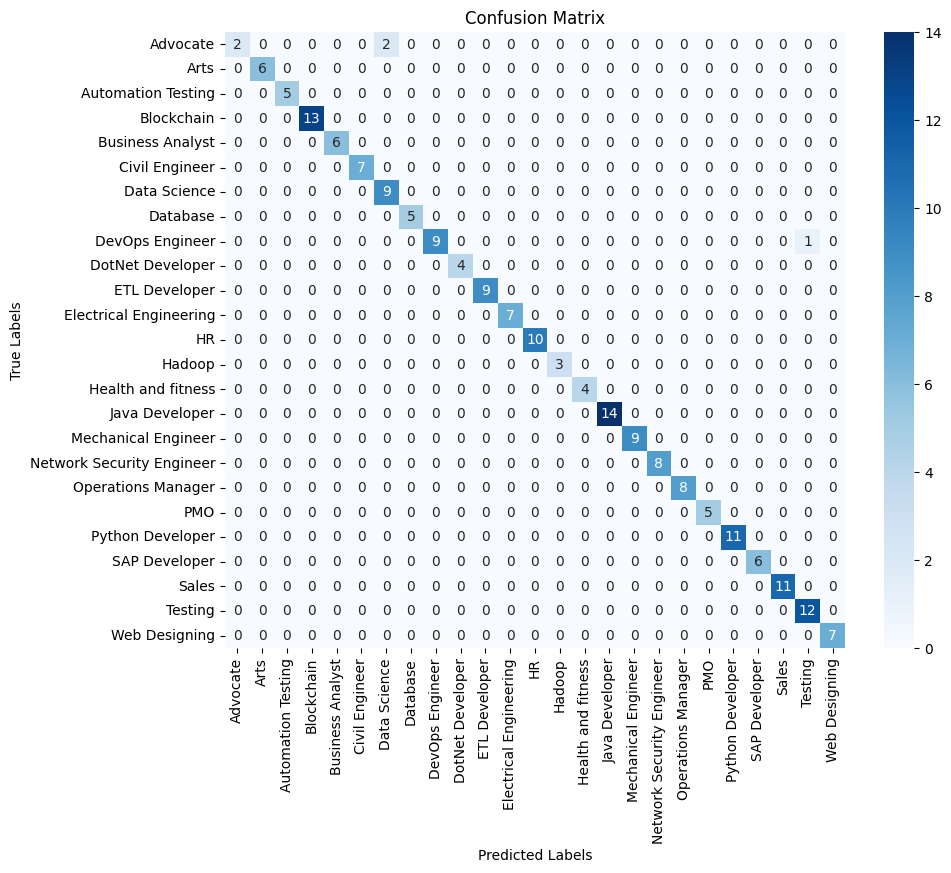

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create RandomForestClassifier with specified parameters
model1 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model1.fit(X_train_bert, y_train_bert)
rfpreds = model1.predict(X_test_bert)
print("Accuracy:", format_score(model1.score(X_test_bert, y_test_bert)))

results(y_test_bert, rfpreds)

0.9792746113989638
Accuracy: 97.9275
Precision: 0.982075437515852
Recall: 0.9792746113989638
F1-score: 0.977881404720783
Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      0.50      0.67         4
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      0.80      0.89         5
               Blockchain       1.00      1.00      1.00        13
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         7
             Data Science       0.82      1.00      0.90         9
                 Database       1.00      1.00      1.00         5
          DevOps Engineer       1.00      0.90      0.95        10
         DotNet Developer       1.00      1.00      1.00         4
            ETL Developer       1.00      1.00      1.00         9
   Electrical Engineering       1.00      1.00    

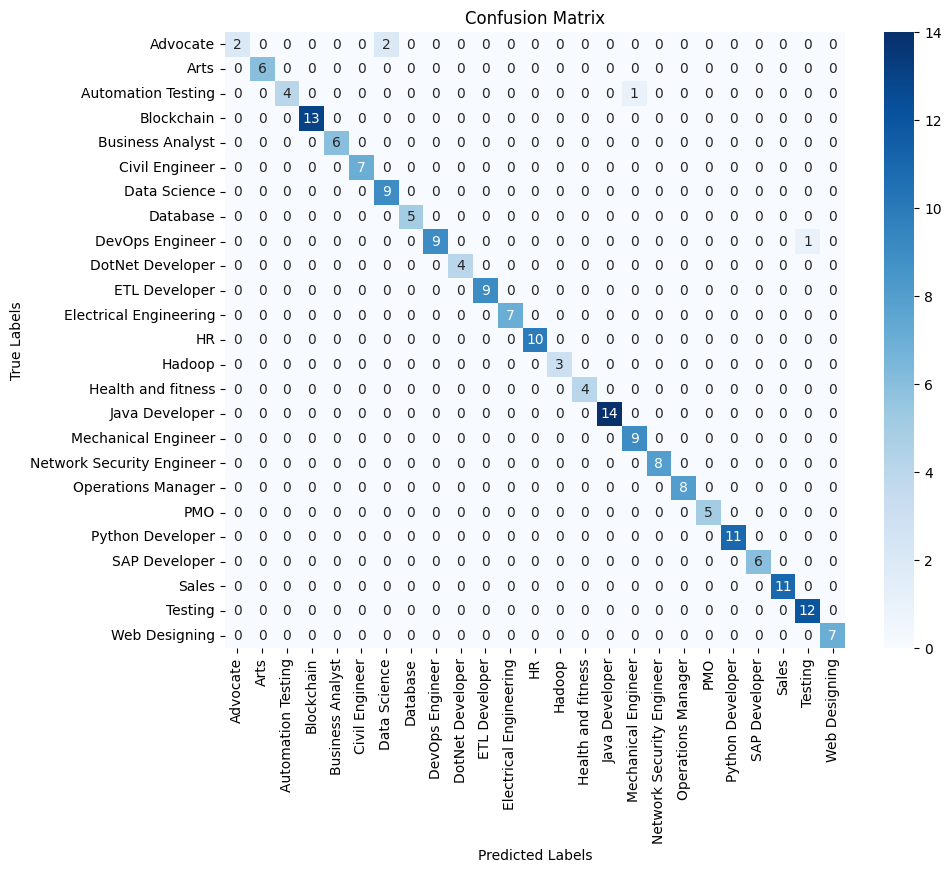

In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
scaler.fit(X_train_bert)
X_train = scaler.transform(X_train_bert)
X_test = scaler.transform(X_test_bert)

mlp = MLPClassifier(hidden_layer_sizes=(100, 50),  # Adjust layers and neurons
                    activation='relu', solver='adam', early_stopping=True, max_iter=500)
mlp.fit(X_train, y_train_bert)
mlp_preds = mlp.predict(X_test)
print(accuracy_score(y_test_bert, mlp_preds))
print("Accuracy:", format_score(mlp.score(X_test, y_test_bert)))

results(y_test_bert, mlp_preds)

Accuracy: 58.5492
Precision: 0.664751979454052
Recall: 0.5854922279792746
F1-score: 0.5771504833680999
Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      0.25      0.40         4
                     Arts       0.55      1.00      0.71         6
       Automation Testing       0.43      0.60      0.50         5
               Blockchain       0.89      0.62      0.73        13
         Business Analyst       0.75      1.00      0.86         6
           Civil Engineer       0.62      0.71      0.67         7
             Data Science       0.44      0.78      0.56         9
                 Database       0.00      0.00      0.00         5
          DevOps Engineer       0.64      0.90      0.75        10
         DotNet Developer       0.33      0.50      0.40         4
            ETL Developer       0.67      0.67      0.67         9
   Electrical Engineering       0.71      0.71      0.71         7
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

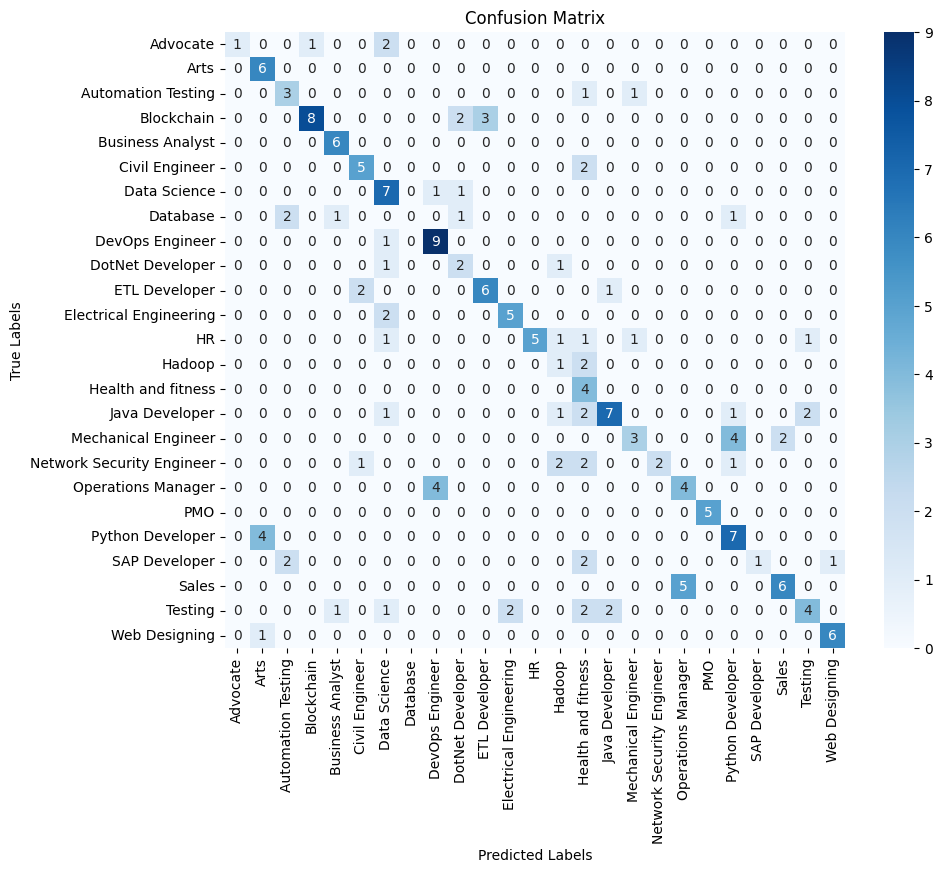

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()
modelNB.fit(X_train_bert, y_train_bert)
NBpreds = modelNB.predict(X_test_bert)

print("Accuracy:", format_score(modelNB.score(X_test_bert, y_test_bert)))

results(y_test_bert, NBpreds)

In [ ]:
 this = np.unique(target)
len(this)

25

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode text labels into numerical format
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(target)

Xg_train, Xg_test, yg_train, yg_test = train_test_split(bert_vectors, label_encoded, test_size=0.2, random_state=1)

In [ ]:
import xgboost as xgb

# Assuming you have loaded your BERT embeddings and corresponding labels
# X_bert: BERT embeddings, y: labels

# Define XGBoost model
modelxg = xgb.XGBClassifier(objective='multi:softmax', num_class=25)  # Set num_classes to the number of classes in your dataset

# Train the model
modelxg.fit(Xg_train, yg_train)

# Make predictions on the test data
xgpreds = modelxg.predict(Xg_test)

# Evaluate the accuracy of the model
accuxg = accuracy_score(yg_test, xgpreds)
print("Accuracy:", accuxg)


Accuracy: 0.9948186528497409


Precision: 0.9955588452997779
Recall: 0.9948186528497409
F1-score: 0.9948815841916469
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         5
           8       1.00      0.90      0.95        10
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       1.00  

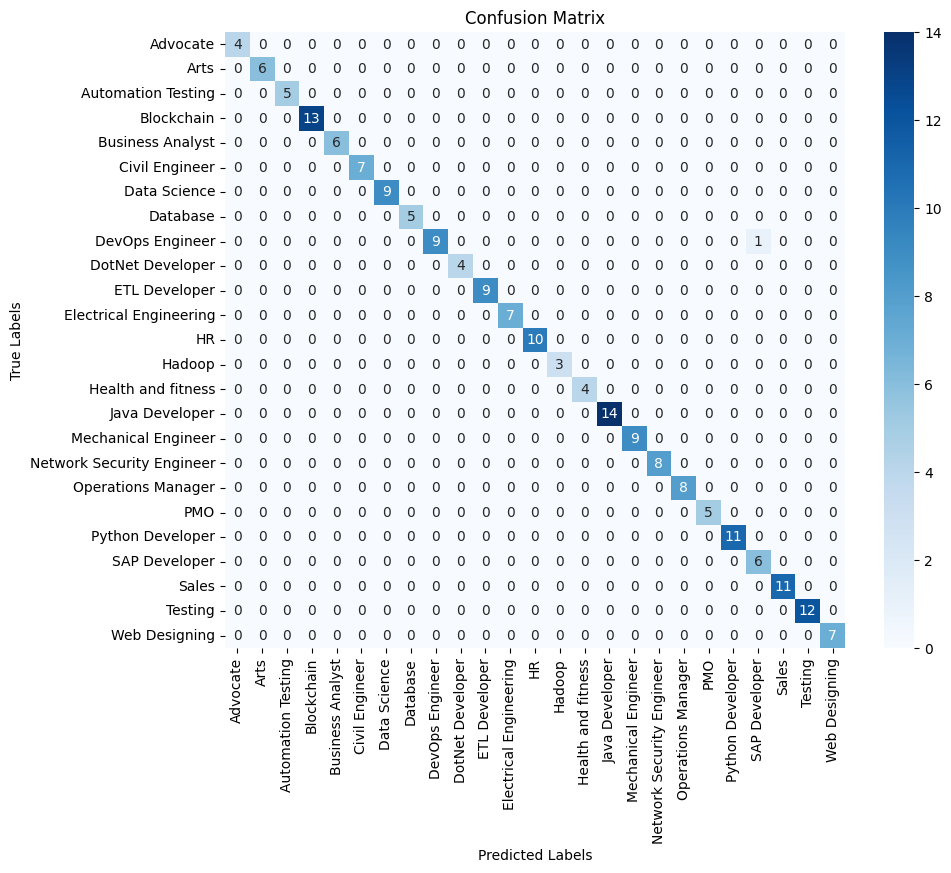

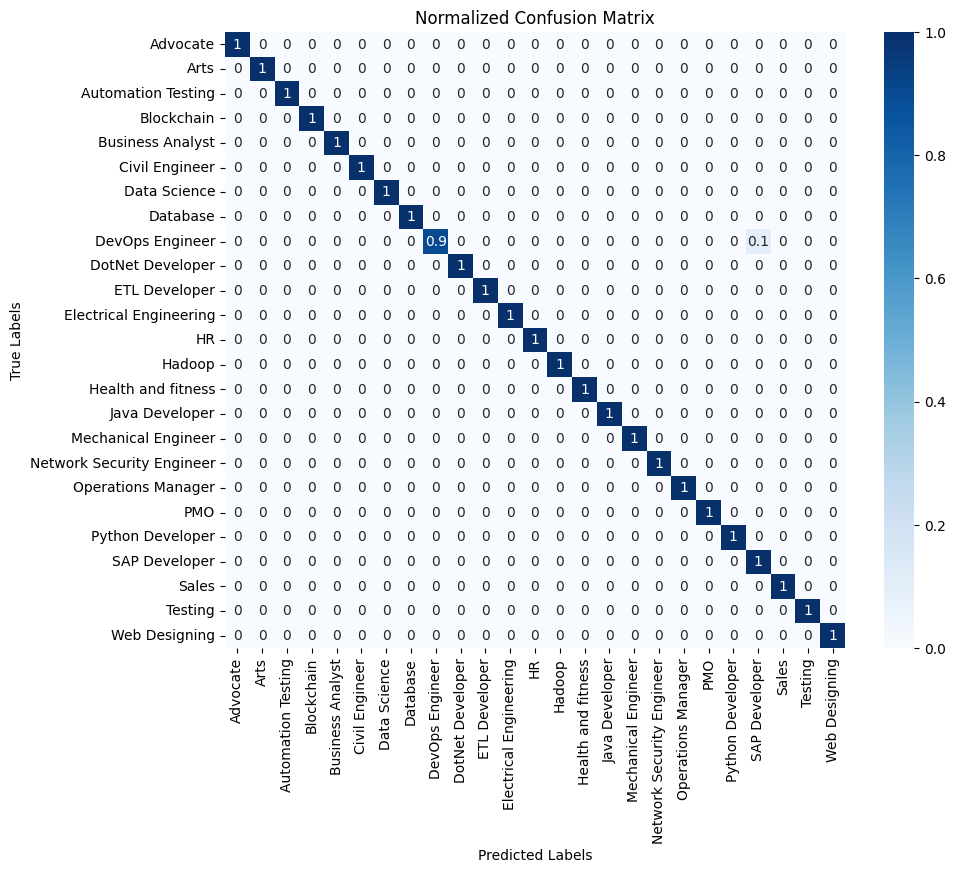

In [ ]:
results(yg_test, xgpreds)
normalizedCM(yg_test, xgpreds)


# **XGBoost take 2**

Accuracy: 0.9948186528497409
Precision: 0.9955588452997779
Recall: 0.9948186528497409
F1-score: 0.9948815841916469
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         5
           8       1.00      0.90      0.95        10
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00       

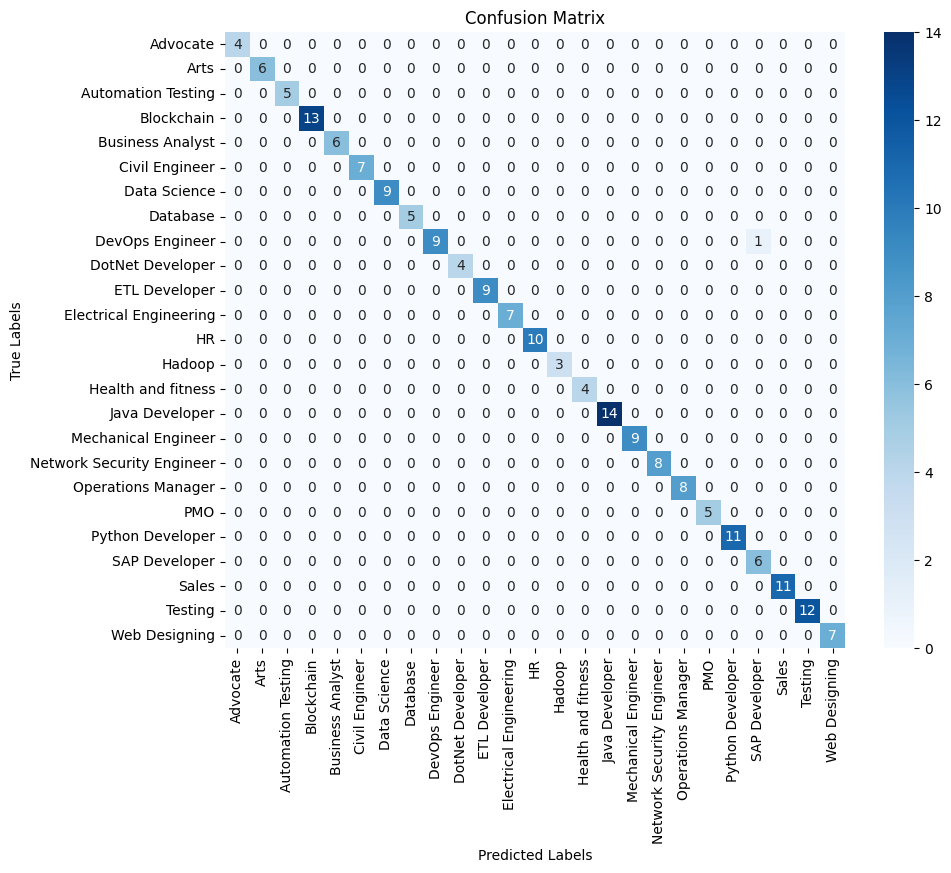

In [ ]:
dtrain = xgb.DMatrix(Xg_train, label=yg_train)
dtest = xgb.DMatrix(Xg_test, label=yg_test)

params = {
    'objective': 'multi:softmax',  # For multiclass classification
    'num_class': 25,  # Number of unique classes
    'max_depth': 6,  # Adjust tree depth
    'eta': 0.3,      # Learning rate - adjust
    # ... other parameters for tuning
}

num_rounds = 100  # Adjust the number of boosting rounds
xgmodel = xgb.train(params, dtrain, num_rounds)
predsX = xgmodel.predict(dtest)
accuX = accuracy_score(yg_test, predsX)
print("Accuracy:", accuX)
results(yg_test, predsX)

# **LightGBM**

In [ ]:
pip install lightgbm --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.9 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [ ]:
import lightgbm as lgb

train_data = lgb.Dataset(Xg_train, label=yg_train)
test_data = lgb.Dataset(Xg_test, label=yg_test, reference=train_data)

# Set parameters for LightGBM model
params = {
    'objective': 'multiclass',
    'num_class': 25,
    'metric': 'multi_error',
}

num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions on the test data
predics = bst.predict(Xg_test)
y_pred = [np.argmax(x) for x in predics]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 104361
[LightGBM] [Info] Number of data points in the train set: 769, number of used features: 768
[LightGBM] [Info] Start training from score -3.872502
[LightGBM] [Info] Start training from score -3.243894
[LightGBM] [Info] Start training from score -3.600569
[LightGBM] [Info] Start training from score -3.349254
[LightGBM] [Info] Start training from score -3.554049
[LightGBM] [Info] Start training from score -3.811878
[LightGBM] [Info] Start training from score -3.211104
[LightGBM] [Info] Start training from score -3.312886
[LightGBM] [Info] Start training from score -2.838428
[LightGBM] [Info] Start training from score -3.467037
[LightGBM] [Info] Start training from score -3.211104
[LightGBM] [Info] Start training from score -3.509597
[LightGBM] [Info] Start training from score -3.118730
[LightGB

Accuracy: 0.9844559585492227
Precision: 0.9877868245743893
Recall: 0.9844559585492227
F1-score: 0.9835319666244128
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        13
           4       0.75      1.00      0.86         6
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         5
           8       1.00      0.90      0.95        10
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00       

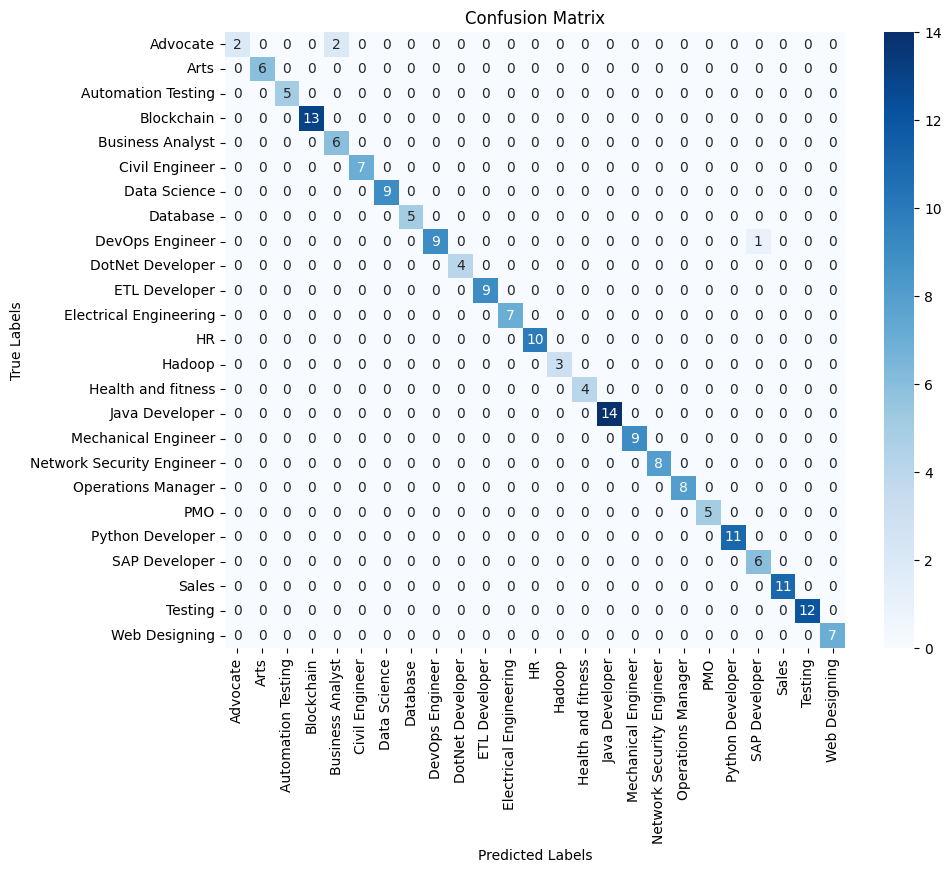

In [ ]:
accuracy = accuracy_score(yg_test, y_pred)
print("Accuracy:", accuracy)

results(yg_test, y_pred)

# **CHATGPT neuralNET**


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/HarishK501/my-sample/master/resume_dataset.csv")

# Preprocess the data
X = data['Resume']
y = data['Category']

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the input text
X_train_tokens = tokenizer(X_train.tolist(), padding=True, truncation=True, max_length=128, return_tensors='tf')
X_test_tokens = tokenizer(X_test.tolist(), padding=True, truncation=True, max_length=128, return_tensors='tf')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x=X_train_tokens['input_ids'], y=y_train, validation_data=(X_test_tokens['input_ids'], y_test), epochs=3, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tokens['input_ids'], y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


AttributeError: 'DecisionTreeClassifier' object has no attribute 'compile'

# **Gemini NeuralNET**

In [ ]:
df["Category"].nunique()

In [ ]:
import pandas as pd
from transformers import TFBertModel, AutoTokenizer
import tensorflow as tf

# **1.  Data Preparation**
def prepare_data(data, tokenizer, max_length, label_columns):
    # Load your cleaned data
    df = pd.DataFrame(data)

    # Encode labels (if they are strings)
    from sklearn.preprocessing import LabelEncoder
    for col in label_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    # Get input and labels
    texts = df['preprocessed'].to_list()
    labels = df[label_columns].to_numpy()

    # Tokenize and generate input sequences
    input_data = tokenizer(texts, padding='max_length', truncation=True, max_length=max_length, return_tensors='tf')

    return input_data, labels

# **2. Load BERT Model and Tokenizer**
model_name = "bert-base-uncased"  # Choose a suitable BERT variant
tokenizer = AutoTokenizer.from_pretrained(model_name)
# bert_model = TFBertModel.from_pretrained(model_name)

preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

bert_preprocess_model = hub.KerasLayer(preprocess_url)
bert_model = hub.KerasLayer(encoder_url)

# **3. Define Classification Model**
# def build_classifier_model():
#     input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
#     attention_masks = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_masks')

#     # Get BERT embeddings (use the [CLS] token as a representation)
#     bert_output = bert_model([input_ids, attention_masks])
#     cls_token = bert_output[0][:, 0, :]

#     # Classification layer
#     output = tf.keras.layers.Dense(25, activation='softmax')(cls_token)

#     model = tf.keras.Model(inputs=[input_ids, attention_masks], outputs=output)
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# bert_preprocess_model = hub.KerasLayer(preprocess_url)
# bert_model = hub.KerasLayer(encoder_url)

# Define the classification model
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessed_text = bert_preprocess_model(text_input)
    bert_outputs = bert_model(preprocessed_text)

    # Use the [CLS] token for classification
    cls_token = bert_outputs['pooled_output']

    output = tf.keras.layers.Dense(25, activation='softmax')(cls_token)

    model = tf.keras.Model(inputs=text_input, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# **4. Train the Model**
max_length = 128  # Adjust as needed
label_columns = ['Category']  # Replace with your actual label column(s)

# Prepare your data (replace with your actual dataset)
input_data, labels = prepare_data(df, tokenizer, max_length, label_columns)

# Build model
model = build_classifier_model()
model.summary()  # View model architecture

# Train
model.fit(input_data, labels, epochs=3, batch_size=16)  # Adjust epochs, batch_size

# **5. Evaluate and Use the Model (example)**
test_resume = "I have skills in Python, SQL, and machine learning..."
test_input = tokenizer(test_resume, padding='max_length', truncation=True, max_length=max_length, return_tensors='tf')
prediction = model.predict(test_input)


# Gemini TAKE 2

In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub

# Load and preprocess data (replace with your actual dataset)
df

# Assuming you need to convert labels to numerical categories
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['Category'] = le.fit_transform(df['Category'])

# Extract input and labels
text_input = df['preprocessed'].to_list()
labels = df['Category'].to_numpy()


# Placeholder for maximum sequence length
max_seq_length = 128  # Adjust as needed


In [ ]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)  # Input for text
    preprocessed_text = bert_preprocess_model(text_input)
    bert_outputs = bert_model(preprocessed_text)

    # Use the [CLS] token for classification
    cls_token = bert_outputs['pooled_output']

    output = tf.keras.layers.Dense(num_classes, activation='softmax')(cls_token)

    model = tf.keras.Model(inputs=text_input, outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
# Define number of classes
num_classes = len(df['Category'].unique())

# Build the model
model = build_classifier_model()
model.summary()  # View model summary

# Train (cross-validate on larger datasets)
model.fit(text_input, labels, epochs=5, batch_size=32)


# tensor

In [ ]:
import shutil

In [ ]:
# dataset = tf.data.experimental.make_csv_dataset(
#     'https://raw.githubusercontent.com/HarishK501/my-sample/master/resume_dataset.csv',
#     batch_size=32,
#     label_name='Category',
#     num_epochs=1,
# )
path = "/content/aclImdb"

X = df["Resume"].to_numpy()
y = df['Category'].to_numpy()

dataset = tf.data.Dataset.from_tensor_slices((X, y))
dataset = dataset.batch(32)

if not os.path.exists(path):
    os.mkdir(path)
dataset_dir = os.path.join(path)

train_dir = os.path.join(dataset_dir, 'train')

# remove unused folders to make it easier to load the data


In [ ]:
import os
import shutil
import tensorflow as tf

path = "/content/aclImdb"

X = df["Resume"].to_numpy()
y = df['Category'].to_numpy()

dataset = tf.data.Dataset.from_tensor_slices((X, y))
dataset = dataset.batch(32)

# Create the main directory if it doesn't exist
if not os.path.exists(path):
    os.mkdir(path)

dataset_dir = os.path.join(path)
train_dir = os.path.join(dataset_dir, 'train')

# Check if the train directory exists, if not, create it
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
else:
    # If it exists, remove the 'unsup' directory
    unsup_dir = os.path.join(train_dir, 'unsup')
    if os.path.exists(unsup_dir):
        shutil.rmtree(unsup_dir)



In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

  # Assuming you want shuffling

val_size = int(0.2 * len(dataset))
train_dataset = dataset.skip(val_size)
val_dataset = dataset.take(val_size)

# raw_train_ds = tf.keras.utils.text_dataset_from_directory(
#     'aclImdb/train',
#     batch_size=batch_size,
#     validation_split=0.2,
#     subset='training',
#     seed=seed)

# class_names = train_dataset.class_names
train_ds = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# val_ds = tf.keras.utils.text_dataset_from_directory(
#     'aclImdb/train',
#     batch_size=batch_size,
#     validation_split=0.2,
#     subset='validation',
#     seed=seed)

val_ds = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# test_ds = tf.keras.utils.text_dataset_from_directory(
#     'aclImdb/test',
#     batch_size=batch_size)

# test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:

AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

# Assuming you have 'X' as input features and 'y' as labels in your dataset
Resume, Category = dataset

# Split the dataset into training and validation sets
train_size = int(0.8 * len(X))
val_size = len(X) - train_size

X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Create TensorFlow datasets from the arrays
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))

# Shuffle and batch the training dataset
train_ds = train_ds.shuffle(train_size, seed=seed).batch(batch_size)

# Cache and prefetch the training dataset
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Batch the validation dataset
val_ds = val_ds.batch(batch_size)

# Cache and prefetch the validation dataset
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Assuming your test data is in separate variables 'X_test' and 'y_test'
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Batch the test dataset
test_ds = test_ds.batch(batch_size)

# Cache and prefetch the test dataset
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

bert_preprocess_model = hub.KerasLayer(preprocess_url)
bert_model = hub.KerasLayer(encoder_url)


In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(preprocess_url, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(encoder_url, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)


In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')


In [ ]:
classifier_model = build_classifier_model()

classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)


In [ ]:


# print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)


In [ ]:
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


In [ ]:
import tensorflow_hub as hub

# preprocess_model = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

text_input = ["This is a sample sentence."]
results = bert_preprocess_model(text_input)


In [ ]:
results

In [ ]:
bert_model(results)